In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [2]:

# Step 1: Data cleaning
data = yf.download(tickers='ETH-usd', period='max', interval='1d')
data.dropna(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-01-19,1515.249634,1557.970337,1514.380005,1552.556519,1552.556519,6432638856
2023-01-20,1552.373657,1659.885742,1544.917847,1659.754150,1659.754150,8528894754
2023-01-21,1659.706055,1674.179321,1626.812988,1627.118164,1627.118164,8859250310


In [3]:
# Step 2: Feature engineering
data['RSI'] = ta.rsi(data.Close, length=15)
data['EMA_short'] = ta.ema(data.Close, length=20)
data['EMA_long'] = ta.ema(data.Close, length=100)
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop([ 'Close'], axis=1, inplace=True)
data

,Date,Open,High,Low,Adj Close,Volume,RSI,EMA_short,EMA_long
0,2018-02-16,934.786011,950.005005,917.848022,944.210022,2369449984,50.673576,918.268825,763.084961
1,2018-02-17,944.747986,976.594971,940.754028,974.114990,2525720064,52.428326,923.587508,767.263773
2,2018-02-18,973.348999,982.932983,915.445007,923.921021,2567290112,49.275923,923.619271,770.365897
3,2018-02-19,921.668030,957.776978,921.554016,943.864990,2169019904,50.541930,925.547435,773.801523
4,2018-02-20,943.567017,965.265015,892.953979,895.370972,2545260032,47.456221,922.673486,776.208839
...,...,...,...,...,...,...,...,...,...
1798,2023-01-19,1515.249634,1557.970337,1514.380005,1552.556519,6432638856,74.087366,1411.743041,1344.826320
1799,2023-01-20,1552.373657,1659.885742,1544.917847,1659.754150,8528894754,79.862386,1435.363147,1351.062514
1800,2023-01-21,1659.706055,1674.179321,1626.812988,1627.118164,8859250310,74.450085,1453.625530,1356.528963
1801,2023-01-22,1627.365967,1658.023438,1612.085693,1628.382080,7517988734,74.521732,1470.269011,1361.912193


In [4]:
# Step 3: Data normalization (cont.)
#scaler = MinMaxScaler()
#data[['Open', 'High', 'Low', 'Volume', 'Close', 'RSI', 'EMA_short', 'EMA_long']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Volume', 'Close', 'RSI', 'EMA_short', 'EMA_long']])
#data
scaler = MinMaxScaler()
data_close = data[['Adj Close']]
data_close = scaler.fit_transform(data_close)
data_close

array([[0.18188281],
       [0.18820818],
       [0.17759136],
       ...,
       [0.32632867],
       [0.32659601],
       [0.32478095]])

In [5]:
# Step 4: Splitting the data
X = data[['Open', 'High', 'Low', 'Volume', 'RSI', 'EMA_short', 'EMA_long']]
X = scaler.fit_transform(X)
y = data_close
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print('X', X)


X [[0.17997119 0.17989954 0.18014681 ... 0.46581789 0.18611508 0.16402886]
 [0.18207919 0.18543178 0.18508855 ... 0.48990784 0.18732707 0.16512842]
 [0.1881313  0.18675045 0.17962838 ... 0.44663031 0.18733431 0.16594467]
 ...
 [0.33336772 0.33056949 0.33309891 ... 0.79223187 0.3081092  0.32017984]
 [0.3265244  0.32720813 0.32992164 ... 0.79321546 0.31190182 0.32159631]
 [0.32656085 0.32365216 0.33006369 ... 0.77276371 0.31514701 0.32294002]]


In [6]:
# Step 5: Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print("x", X.shape)
print('y',y.shape)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('Y_test', y_test.shape) 
print('X_train.shape[1]', X_train.shape[1])
print('X_train.shape[2]', X_train.shape[2])

x (1803, 7)
y (1803, 1)
X_train (1442, 1, 7)
y_train (1442, 1)
X_test (361, 1, 7)
Y_test (361, 1)
X_train.shape[1] 1
X_train.shape[2] 7


In [7]:
# Step 6: Building the LSTM model (cont.)

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True , activation= 'softmax'))
model.add(Dropout(0.2))
model.add(LSTM(100, activation= 'softmax'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            43200     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 123,701
Trainable params: 123,701
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Step 7: Training and evaluating the model
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
46/46 [==============================] - 7s 30ms/step - loss: 0.0899 - val_loss: 0.1117
Epoch 2/250
46/46 [==============================] - 0s 10ms/step - loss: 0.0763 - val_loss: 0.0846
Epoch 3/250
46/46 [==============================] - 0s 10ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 4/250
46/46 [==============================] - 0s 10ms/step - loss: 0.0691 - val_loss: 0.0618
Epoch 5/250
46/46 [==============================] - 0s 10ms/step - loss: 0.0688 - val_loss: 0.0596
Epoch 6/250
46/46 [==============================] - 0s 10ms/step - loss: 0.0687 - val_loss: 0.0589
Epoch 7/250
46/46 [==============================] - 0s 10ms/step - loss: 0.0688 - val_loss: 0.0590
Epoch 8/250
46/46 [==============================] - 0s 10ms/step - loss: 0.0688 - val_loss: 0.0591
Epoch 9/250
46/46 [==============================] - 1s 12ms/step - loss: 0.0686 - val_loss: 0.0582
Epoch 10/250
46/46 [==============================] - 1s 13ms/step - loss: 0.0684 - val_loss: 0.0582

In [9]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score:.4f}')

Test loss: 0.0004


In [10]:

# Step 8: Tuning the Hyperparameters
# You can use techniques such as grid search or random search to find the best values for the model's hyperparameters

# Step 9: Testing the model
y_pred = model.predict(X_test)
print('y_pred',y_pred.shape)
print('y_test',y_test.shape)
#y_pred = y_pred.reshape(-1,1)
#y_pred = np.nan_to_num(y_pred)
#y_pred = scaler.inverse_transform(y_pred)
#y_pred = scaler.inverse_transform(y_pred[:,[-1]])
#y_test = scaler.inverse_transform(y_test)
#y_test = np.nan_to_num(y_test)


#evaluat
mse = mean_squared_error(y_test, y_pred )
mae = mean_absolute_error(y_test, y_pred)
mape = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



print("MAPE: {:.4f}%".format(mape))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("MAE:{:.4f}".format(mae))

12/12 [==============================] - 1s 4ms/step
y_pred (361, 1)
y_test (361, 1)
MAPE: 5.0536%
RMSE: 0.0200
MSE: 0.0004
MAE:0.0154


In [11]:
# Calculate mean absolute percentage error (MAPE)
def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

mape_value = mape(y_test, y_pred)
print(f'MAPE: {mape_value:.4f}%')

MAPE: 5.0536%


In [12]:
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

SMAPE1 = smape(y_test, y_pred)
print("smape: {:.4f}%".format(SMAPE1))

smape: 4.8236%


ValueError: x and y must have same first dimension, but have shapes (1803,) and (361, 1)

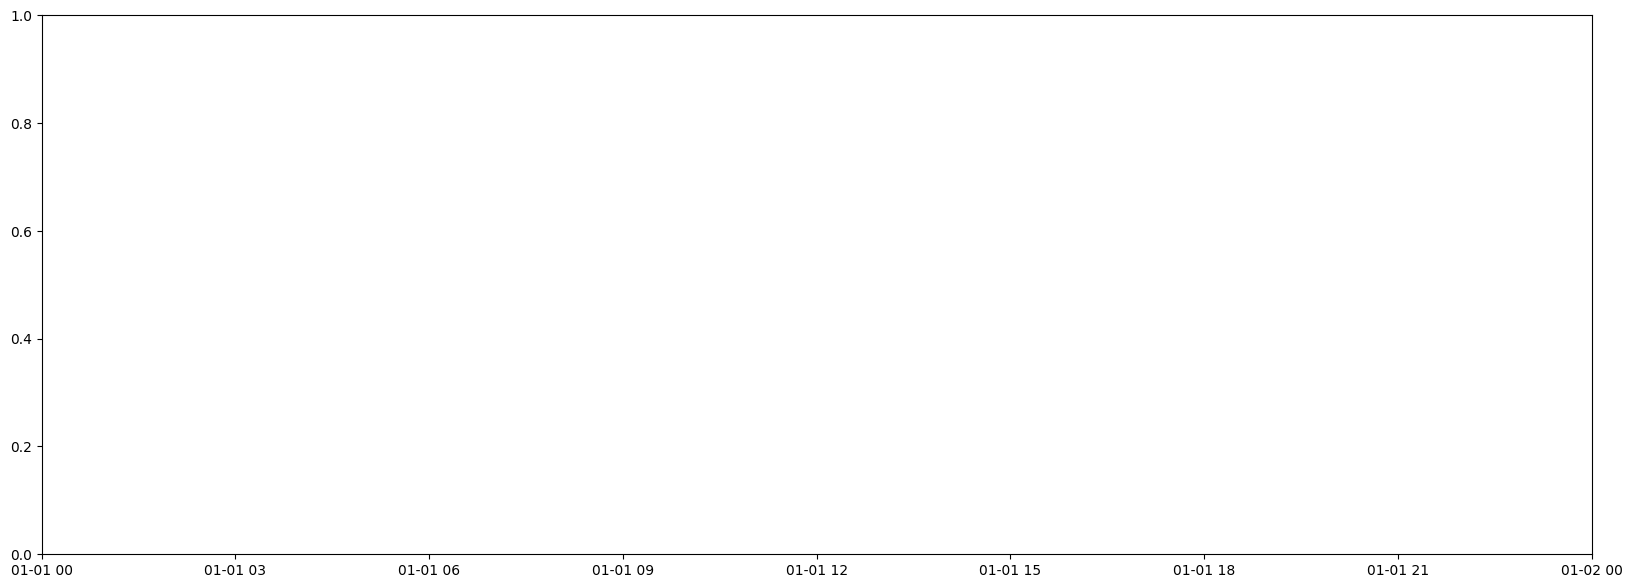

In [15]:
plt.figure(figsize=(20,7))
plt.plot(data['Date'].values, y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(data['Date'].values, y_pred, color = 'blue', label = 'Predicted Bitcoin Price')
plt.xticks(np.arange(100,data[1800:].shape[0],20))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()